In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [200]:
import pandas as pd

def read_csv_files(file_paths, low_memory=True):

    dfs = {}

    for file_path in file_paths:
        file_name = file_path.split('\\')[-1].split('.')[0]
        dfs[file_name] = pd.read_csv(file_path, low_memory=low_memory)

    return dfs
csv_files = [
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\teams.csv',
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\matches.csv',
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\venues.csv',
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\players.csv',
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\innings.csv',
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\overHistory.csv',
    r'C:\Users\Hp\Downloads\ICC Cricket World Cup\overBallDetails.csv',
]


df_matches = dataframes.get('matches')
df_venue = dataframes.get('venues')
df_players = dataframes.get('players')
df_innings = dataframes.get('innings')
df_overHistory = dataframes.get('overHistory')
df_overBallDetails = dataframes.get('overBallDetails')


In [162]:
def aboutData(data):
    print("----------info-----------")
    data.info()
    print("-----------column----------")
    data.columns
    print("-----------description----------")
    data.describe()
    print("-----------first five values----------")
    data.head()
    print("-----------shape----------")
    data.shape
    print("----------column types-----------")
    print(data.dtypes)
    print("----------duplicate-----------")
    data.duplicated() #check duplicates in any row
    data.duplicated().sum() #check noumber of duplicates
    print("----------missing values sum-----------")
    print(data.isnull().sum())
    print("----------end-----------")
    for column in data:
        print("Column"," ",column,"  uniquevalue are :", data[column].nunique())
        print(data[column].unique())
        print("-------------------------")
        print("Column"," ",column,"  value count is :", data[column].value_counts())
        print("-------------------------")
        print( "column name:", column, "- misisng values ",data[column].isnull().sum())
        print("------------------------------------------------------------------")    

# Team

In [163]:
aboutData(df_team)

----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       348 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB
-----------column----------
-----------description----------
-----------first five values----------
-----------shape----------
----------column types-----------
id                  int64
fullName           object
shortName          object
abbreviation       object
wicketKeeperId    float64
captainId         float64
dtype: object
----------duplicate-----------
----------missing values sum-----------
id                0
fullName          0
short

Let's find out invalid wicketKeeperId and captainId in df_team

In [164]:
#invalid wicket keepers if any

unique_wicket_keeper_from_teams_df = set(df_team['wicketKeeperId'].unique())

# Extract unique player IDs from the player DataFrame
unique_players_from_players_df = set(df_players['id'].unique())

# Identify wicket keeper IDs in Teams DataFrame that do not exist in Players DataFrame
invalid_wicketkeeper_ids = unique_wicket_keeper_from_teams_df - unique_players_from_players_df

# Display the invalid team IDs
print("Invalid wicket keeper in teams DataFrame:", invalid_wicketkeeper_ids)
print("Count of Invalid wicket keeper in teams DataFrame:", len(invalid_wicketkeeper_ids))


#invalid captain if any

unique_captain_from_teams_df = set(df_team['captainId'].unique())
invalid_captain_ids = unique_captain_from_teams_df - unique_players_from_players_df
print("Invalid captain in teams DataFrame:", invalid_captain_ids)
print("Count of Invalid captain in teams DataFrame:", len(invalid_captain_ids))

Invalid wicket keeper in teams DataFrame: {nan}
Count of Invalid wicket keeper in teams DataFrame: 1
Invalid captain in teams DataFrame: {nan}
Count of Invalid captain in teams DataFrame: 1


In [165]:
team_counts = df_team['fullName'].value_counts().reset_index()
team_counts.columns = ['Country', 'TeamCount']

# Print or display the result
print(team_counts)

                     Country  TeamCount
0                  Sri Lanka         40
1                  Australia         29
2                   Zimbabwe         27
3                   Pakistan         25
4                New Zealand         25
5                West Indies         25
6                      India         24
7               South Africa         22
8                    England         20
9                Afghanistan         15
10                Bangladesh         15
11                  Scotland         11
12      United Arab Emirates         10
13                   Ireland         10
14               Netherlands          8
15                     Nepal          8
16                     Kenya          7
17          Papua New Guinea          6
18                   Namibia          5
19                    Canada          5
20  United States of America          5
21                      Oman          4
22                 Hong Kong          4
23               East Africa          2


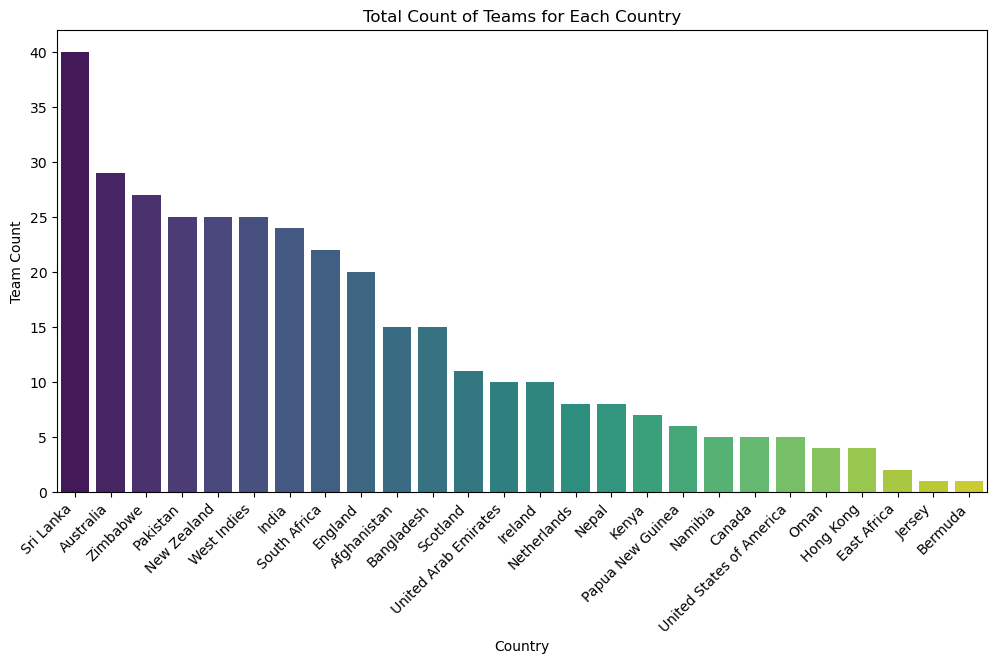

In [166]:
# Visualize the total count of teams for each country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TeamCount', data=team_counts, palette='viridis')
plt.title('Total Count of Teams for Each Country')
plt.xlabel('Country')
plt.ylabel('Team Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Venue


In [167]:
aboutData(df_venue)

----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  173 non-null    object
 3   city       185 non-null    object
 4   country    173 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB
-----------column----------
-----------description----------
-----------first five values----------
-----------shape----------
----------column types-----------
id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object
----------duplicate-----------
----------missing values sum-----------
id            0
fullName      0
shortName    20
city          8
country      20
dtype: int64
----------end-----------
Column   id   uniquevalue are : 193
[     1      2      3      4      5      6     

Fill missing values with a specific value (e.g., 'Unknown' for object columns)


In [168]:
df_venue['city'].fillna('Unknown', inplace=True)
df_venue['country'].fillna('Unknown', inplace=True)
df_venue['shortName'].fillna('Unknown', inplace=True)

Now, lets call aboutData() function again

In [169]:
aboutData(df_venue)

----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  193 non-null    object
 3   city       193 non-null    object
 4   country    193 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB
-----------column----------
-----------description----------
-----------first five values----------
-----------shape----------
----------column types-----------
id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object
----------duplicate-----------
----------missing values sum-----------
id           0
fullName     0
shortName    0
city         0
country      0
dtype: int64
----------end-----------
Column   id   uniquevalue are : 193
[     1      2      3      4      5      6      7   

Now there are no missing values, all the missing values have been replaced with the string 'Unknown'

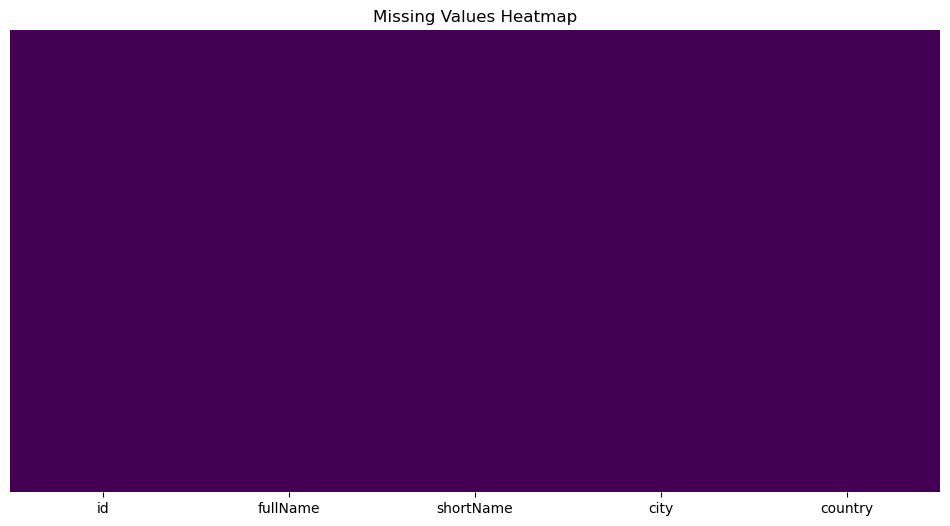

In [170]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_venue.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()
#the following heat map shows no missing values

Let's find out the number of venues for each country and then for each city

In [171]:
# Group by country and count the number of venues
venues_by_country = df_venue.groupby('country')['id'].count()

# Group by both country and city and count the number of venues
venues_by_city = df_venue.groupby(['country', 'city'])['id'].count()

print("Number of venues for each country:")
print(venues_by_country)

print("\nNumber of venues for each city within each country:")
print(venues_by_city)

Number of venues for each country:
country
Australia            16
Bangladesh            5
England              19
India                42
Ireland               6
Kenya                 1
Malaysia              1
Namibia               4
Nepal                 1
Netherlands           4
New Zealand          16
Northern Ireland      2
Oman                  4
Pakistan              8
Papua New Guinea      1
Qatar                 1
Scotland              3
South Africa         12
Sri Lanka             7
Trinidad & Tobago     1
UAE                   4
USA                   1
Unknown              20
Wales                 2
West Indies           8
Zimbabwe              4
Name: id, dtype: int64

Number of venues for each city within each country:
country      city         
Australia    Adelaide         1
             Albury           1
             Ballarat         1
             Berri            1
             Brisbane         2
                             ..
West Indies  Port of Spain    1
      

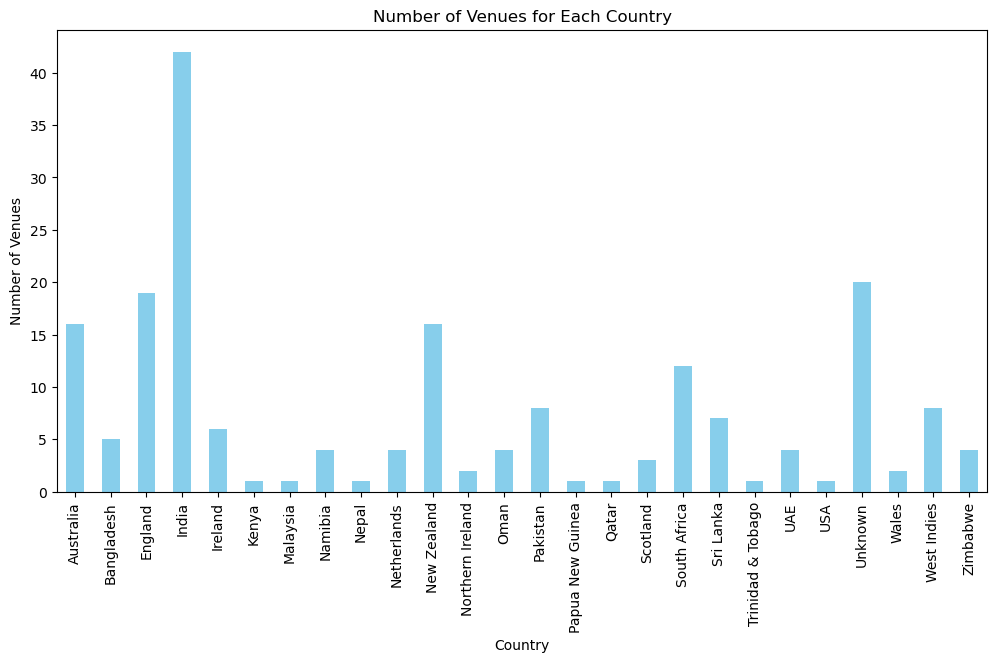

<Figure size 1200x600 with 0 Axes>

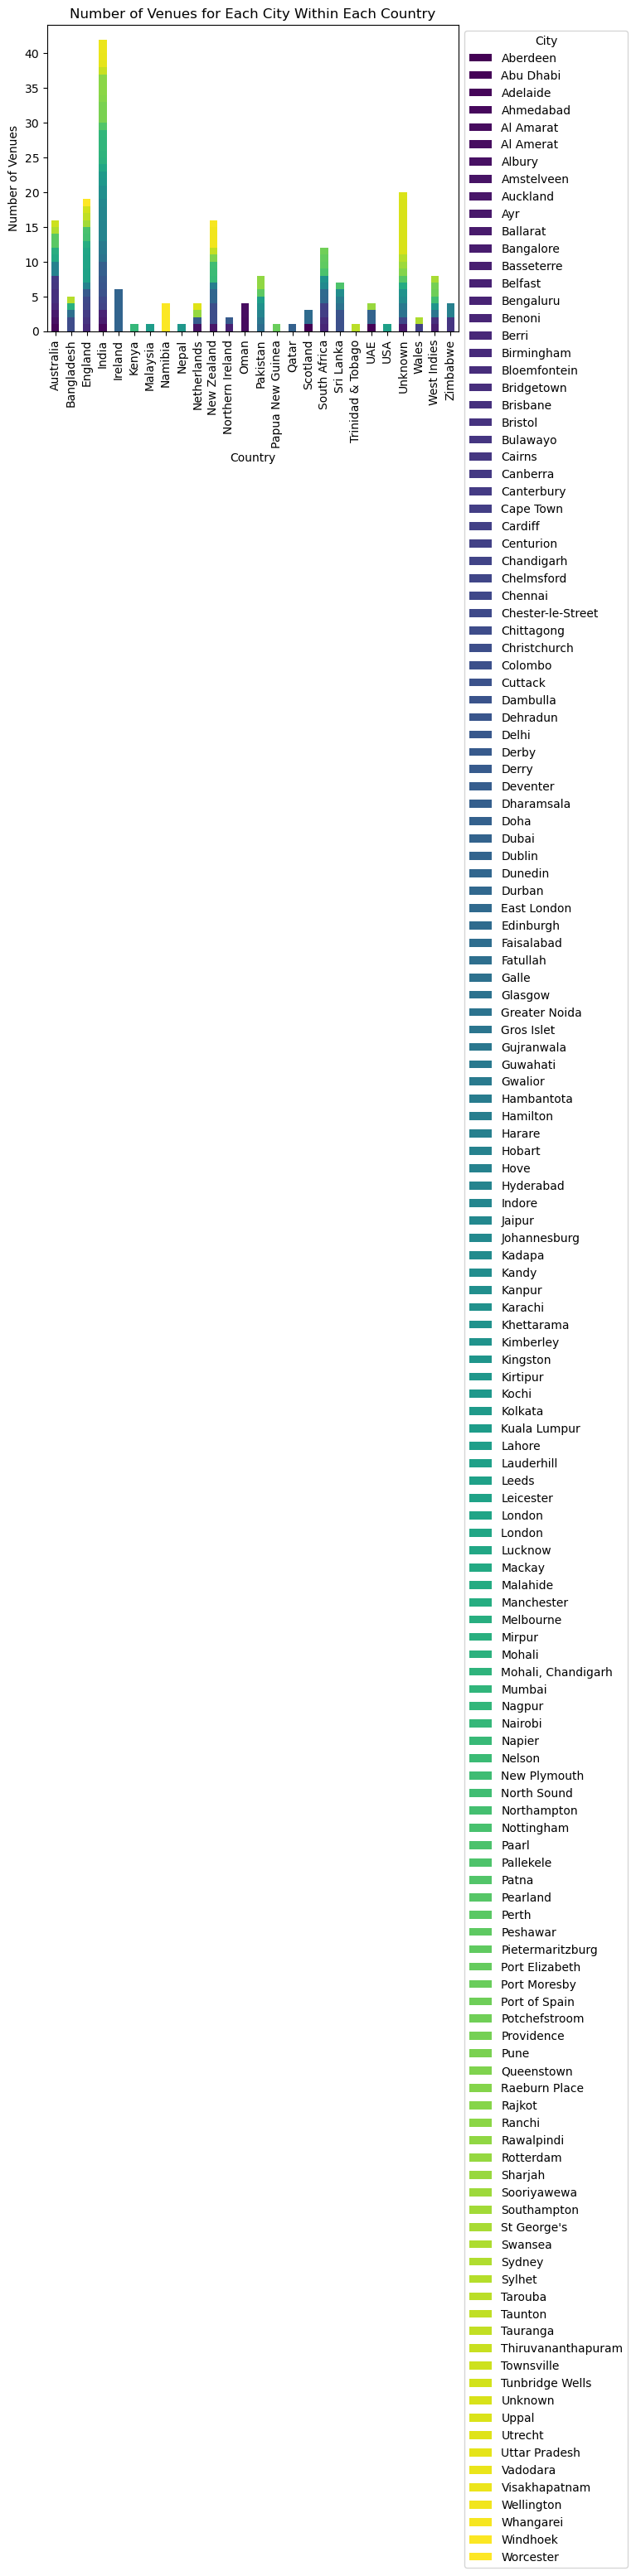

In [172]:
# Plotting the number of venues for each country
plt.figure(figsize=(12, 6))
venues_by_country.plot(kind='bar', color='skyblue')
plt.title('Number of Venues for Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Venues')
plt.show()

# Plotting the number of venues for each city within each country
plt.figure(figsize=(12, 6))
venues_by_city.unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Venues for Each City Within Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Venues')
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.show()

# Matches

In [173]:
aboutData(df_matches)


----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 174 entries, id to Unnamed: 173
dtypes: bool(1), float64(156), int64(5), object(12)
memory usage: 2.2+ MB
-----------column----------
-----------description----------
-----------first five values----------
-----------shape----------
----------column types-----------
id                int64
venueId           int64
toss.elected     object
toss.winner      object
team1Id           int64
                 ...   
Unnamed: 169    float64
Unnamed: 170    float64
Unnamed: 171    float64
Unnamed: 172    float64
Unnamed: 173    float64
Length: 174, dtype: object
----------duplicate-----------
----------missing values sum-----------
id                 0
venueId            0
toss.elected     100
toss.winner      100
team1Id            0
                ... 
Unnamed: 169    1700
Unnamed: 170    1700
Unnamed: 171    1700
Unnamed: 172    1700
Unnamed: 173    1700
Length: 174, dtype: int64
-----

Column   match.summary   value count is : match.summary
Match cancelled without a ball bowled    32
Match abandoned without a ball bowled    23
No Result                                21
No result                                15
Match Abandoned without a ball bowled    11
                                         ..
Pakistan win by 131 runs                  1
Bangladesh win by 48 runs                 1
Windies win by 3 runs                     1
Bangladesh win by 18 runs                 1
South Africa won by 111 runs              1
Name: count, Length: 661, dtype: int64
-------------------------
column name: match.summary - misisng values  822
------------------------------------------------------------------
Column   matchStatus   uniquevalue are : 0
[nan]
-------------------------
Column   matchStatus   value count is : Series([], Name: count, dtype: int64)
-------------------------
column name: matchStatus - misisng values  1700
----------------------------------------------------

Column   Unnamed: 132   uniquevalue are : 0
[nan]
-------------------------
Column   Unnamed: 132   value count is : Series([], Name: count, dtype: int64)
-------------------------
column name: Unnamed: 132 - misisng values  1700
------------------------------------------------------------------
Column   Unnamed: 133   uniquevalue are : 0
[nan]
-------------------------
Column   Unnamed: 133   value count is : Series([], Name: count, dtype: int64)
-------------------------
column name: Unnamed: 133 - misisng values  1700
------------------------------------------------------------------
Column   Unnamed: 134   uniquevalue are : 0
[nan]
-------------------------
Column   Unnamed: 134   value count is : Series([], Name: count, dtype: int64)
-------------------------
column name: Unnamed: 134 - misisng values  1700
------------------------------------------------------------------
Column   Unnamed: 135   uniquevalue are : 0
[nan]
-------------------------
Column   Unnamed: 135   value cou

Removing unnamed columns

In [174]:
df_matches = df_matches.loc[:, ~df_matches.columns.str.startswith('Unnamed')]


Dropping columns with all missing values

In [175]:
df_matches.dropna(axis=1, how='all')

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,matchStatus_victoryMarginWickets,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,match.summary,umpire.name.5
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 3,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 4,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,Match 5,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,102108,62,South Africa who chose to bowl,South Africa,19,15,2023-09-09T13:00:00+0200,2023-09-09T21:00:00+0200,1.694260e+12,NaN,...,NaN,Australia won by 123 runs,Australia won by 123 runs,ODI,South Africa v Australia - 2023 Men's ODI Series,50,300.0,True,Australia won by 123 runs,NaN
1696,102843,100013,Pakistan who chose to bowl,Pakistan,20,14,2023-09-10T15:00:00+0530,2023-09-10T22:00:00+0530,1.694340e+12,NaN,...,NaN,India won by 228 runs,India won by 228 runs,ODI,Asia Cup 2023,50,300.0,True,India won by 228 runs,NaN
1697,101735,72,New Zealand who chose to bowl,New Zealand,11,16,2023-09-10T11:00:00+0100,2023-09-10T19:00:00+0100,1.694340e+12,NaN,...,NaN,England won by 79 runs,England won by 79 runs,ODI,England v New Zealand - 2023 Men's ODI Series,50,300.0,True,England won by 79 runs,NaN
1698,102844,100013,India who chose to bat,India,14,13,2023-09-12T15:00:00+0530,2023-09-12T22:00:00+0530,1.694510e+12,NaN,...,NaN,India won by 41 runs,India won by 41 runs,ODI,Asia Cup 2023,50,300.0,True,India won by 41 runs,NaN


Populating the below columns with 'Unknown' where there are missing values

In [176]:
df_matches['toss.elected'].fillna('Unknown', inplace=True)
df_matches['toss.winner'].fillna('Unknown', inplace=True)
df_matches['matchEndDate'].fillna('Unknown', inplace=True)
df_matches['matchStatus_outcome'].fillna('Unknown', inplace=True)
df_matches['matchStatus_text'].fillna('Unknown', inplace=True)
df_matches['umpire.name.5'].fillna('Unknown', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_127988\4229934052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['toss.elected'].fillna('Unknown', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_127988\4229934052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['toss.winner'].fillna('Unknown', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_127988\4229934052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Dropping the columns that are repititive and do not make any sense

In [177]:
df_matches.drop('matchDateMs', axis=1)
df_matches.drop('matchEndDateMs', axis=1)

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchStatus_outcome,...,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,match.summary,matchStatus,umpire.name.5
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,A,...,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,Unknown
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,B,...,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,Unknown
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,A,...,Match 3,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,Unknown
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,B,...,Match 4,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,Unknown
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,A,...,Match 5,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,102108,62,South Africa who chose to bowl,South Africa,19,15,2023-09-09T13:00:00+0200,2023-09-09T21:00:00+0200,1.694260e+12,B,...,Australia won by 123 runs,Australia won by 123 runs,ODI,South Africa v Australia - 2023 Men's ODI Series,50,300.0,True,Australia won by 123 runs,NaN,Unknown
1696,102843,100013,Pakistan who chose to bowl,Pakistan,20,14,2023-09-10T15:00:00+0530,2023-09-10T22:00:00+0530,1.694340e+12,B,...,India won by 228 runs,India won by 228 runs,ODI,Asia Cup 2023,50,300.0,True,India won by 228 runs,NaN,Unknown
1697,101735,72,New Zealand who chose to bowl,New Zealand,11,16,2023-09-10T11:00:00+0100,2023-09-10T19:00:00+0100,1.694340e+12,A,...,England won by 79 runs,England won by 79 runs,ODI,England v New Zealand - 2023 Men's ODI Series,50,300.0,True,England won by 79 runs,NaN,Unknown
1698,102844,100013,India who chose to bat,India,14,13,2023-09-12T15:00:00+0530,2023-09-12T22:00:00+0530,1.694510e+12,A,...,India won by 41 runs,India won by 41 runs,ODI,Asia Cup 2023,50,300.0,True,India won by 41 runs,NaN,Unknown


match status text, match summary, match.summary look the same so dropping the later two as they have missing values

In [178]:
df_matches.drop('matchSummary', axis=1)
df_matches.drop('match.summary', axis=1)


,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,matchStatus_victoryMarginInningsRuns,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,matchStatus,umpire.name.5
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Unknown
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Unknown
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 3,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Unknown
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 4,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Unknown
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,Match 5,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,102108,62,South Africa who chose to bowl,South Africa,19,15,2023-09-09T13:00:00+0200,2023-09-09T21:00:00+0200,1.694260e+12,NaN,...,NaN,Australia won by 123 runs,Australia won by 123 runs,ODI,South Africa v Australia - 2023 Men's ODI Series,50,300.0,True,NaN,Unknown
1696,102843,100013,Pakistan who chose to bowl,Pakistan,20,14,2023-09-10T15:00:00+0530,2023-09-10T22:00:00+0530,1.694340e+12,NaN,...,NaN,India won by 228 runs,India won by 228 runs,ODI,Asia Cup 2023,50,300.0,True,NaN,Unknown
1697,101735,72,New Zealand who chose to bowl,New Zealand,11,16,2023-09-10T11:00:00+0100,2023-09-10T19:00:00+0100,1.694340e+12,NaN,...,NaN,England won by 79 runs,England won by 79 runs,ODI,England v New Zealand - 2023 Men's ODI Series,50,300.0,True,NaN,Unknown
1698,102844,100013,India who chose to bat,India,14,13,2023-09-12T15:00:00+0530,2023-09-12T22:00:00+0530,1.694510e+12,NaN,...,NaN,India won by 41 runs,India won by 41 runs,ODI,Asia Cup 2023,50,300.0,True,NaN,Unknown


Match type is ODI for all the matches so total balls normally will be 300, but due to situations like no balls etc we can't come to any conclusion of populating the missing values for total balls to 300

In [179]:
#df2['totalBalls'].fillna(300, inplace=True)


We can populate 'matchStatus_victoryMarginRuns' and 'matchStatus_victoryMarginWickets' from matchstatus_text

In [180]:
df_matches['matchStatus_victoryMarginRuns'] = df_matches['matchStatus_text'].str.extract('(\d+) run', expand=False)
df_matches['matchStatus_victoryMarginWickets'] = df_matches['matchStatus_text'].str.extract('(\d+) wicket', expand=False)

C:\Users\Hp\AppData\Local\Temp\ipykernel_127988\2108373773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['matchStatus_victoryMarginRuns'] = df_matches['matchStatus_text'].str.extract('(\d+) run', expand=False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_127988\2108373773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['matchStatus_victoryMarginWickets'] = df_matches['matchStatus_text'].str.extract('(\d+) wicket', expand=False)


There are invalid team IDs in teamId1 and teamId2. Let's find out those IDs and the total count of such IDs

In [181]:
# Extract unique team IDs from the Matches DataFrame
unique_team_ids_matches = set(df_matches['team1Id'].unique()) | set(df_matches['team2Id'].unique())

# Extract unique team IDs from the Teams DataFrame
unique_team_ids_teams = set(df_team['id'].unique())

# Identify team IDs in Matches DataFrame that do not exist in Teams DataFrame
invalid_team_ids = unique_team_ids_matches - unique_team_ids_teams

# Display the invalid team IDs
print("Invalid Team IDs in Matches DataFrame:", len(invalid_team_ids))

Invalid Team IDs in Matches DataFrame: 2612


Now, lets call aboutData() function again

In [182]:
aboutData(df_matches)

----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1700 non-null   int64  
 1   venueId                               1700 non-null   int64  
 2   toss.elected                          1700 non-null   object 
 3   toss.winner                           1700 non-null   object 
 4   team1Id                               1700 non-null   int64  
 5   team2Id                               1700 non-null   int64  
 6   matchDate                             1700 non-null   object 
 7   matchEndDate                          1700 non-null   object 
 8   matchDateMs                           1675 non-null   float64
 9   matchEndDateMs                        1358 non-null   float64
 10  matchStatus_outcome                   1700 non-null   obje

Column   matchSummary   value count is : matchSummary
Match cancelled without a ball bowled    30
Match abandoned without a ball bowled    23
No Result                                21
No result                                15
Match Abandoned                          10
                                         ..
Windies win by 3 runs                     1
Bangladesh win by 18 runs                 1
Netherlands win by 55 runs                1
Nepal win by 1 run                        1
South Africa won by 111 runs              1
Name: count, Length: 684, dtype: int64
-------------------------
column name: matchSummary - misisng values  799
------------------------------------------------------------------
Column   matchType   uniquevalue are : 1
['ODI']
-------------------------
Column   matchType   value count is : matchType
ODI    1700
Name: count, dtype: int64
-------------------------
column name: matchType - misisng values  0
----------------------------------------------------

The data is relatively cleaner now, but still not completely clean

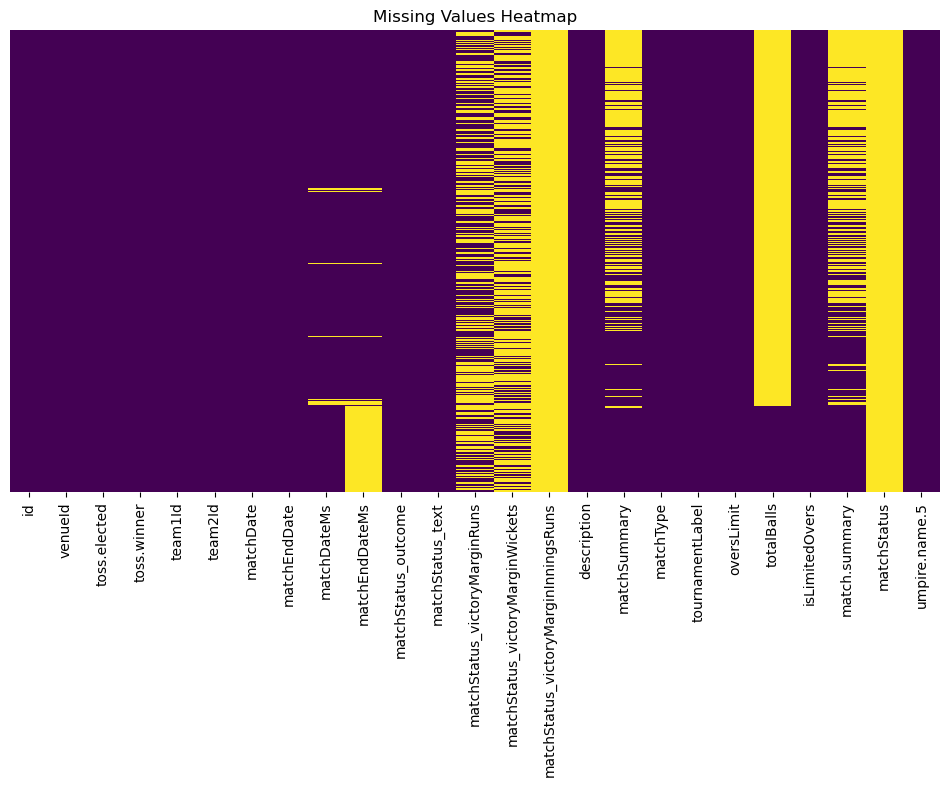

In [183]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_matches.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

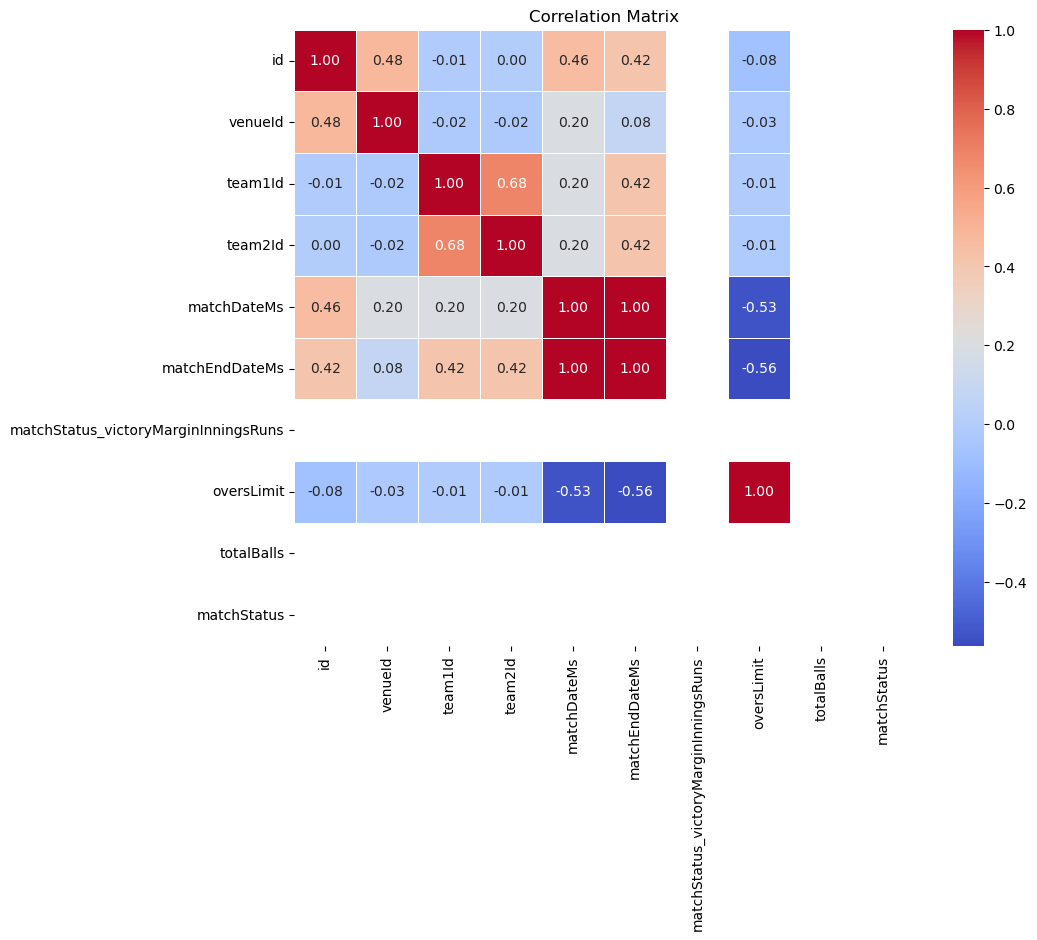

In [184]:

# Select only numeric columns for correlation matrix
numeric_columns = df_matches.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

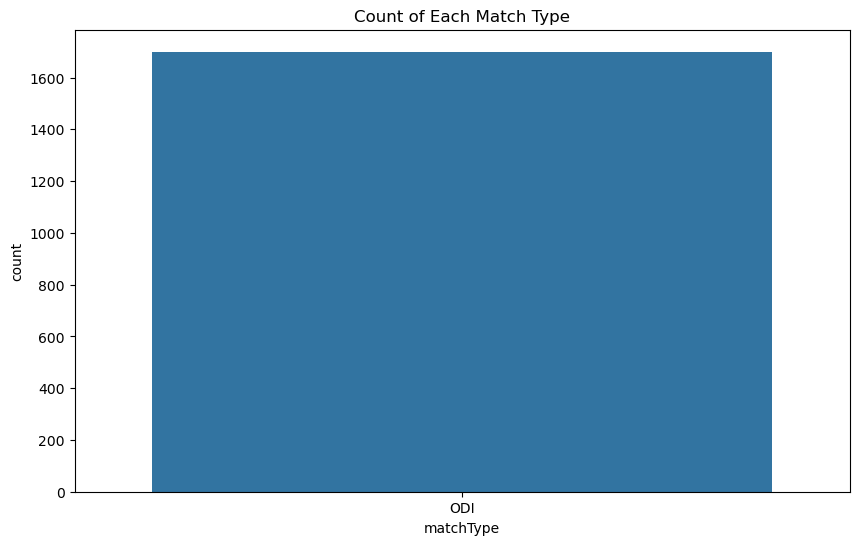

In [185]:
# Visualize categorical variables
# For example, if 'matchType' is a categorical column
plt.figure(figsize=(10, 6))
sns.countplot(x='matchType', data=df_matches)
plt.title('Count of Each Match Type')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_x                                  1700 non-null   int64  
 1   venueId                               1700 non-null   int64  
 2   toss.elected                          1700 non-null   object 
 3   toss.winner                           1700 non-null   object 
 4   team1Id                               1700 non-null   int64  
 5   team2Id                               1700 non-null   int64  
 6   matchDate                             1700 non-null   object 
 7   matchEndDate                          1700 non-null   object 
 8   matchDateMs                           1675 non-null   float64
 9   matchEndDateMs                        1358 non-null   float64
 10  matchStatus_outcome                   1700 non-null   object 
 11  matchStatus_text 

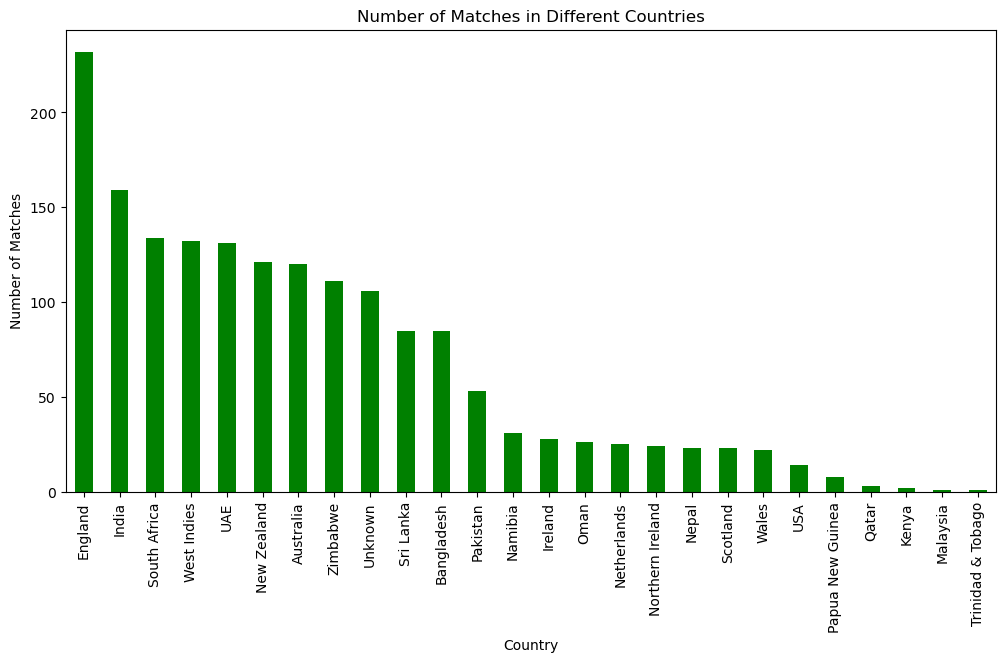

<Figure size 1200x600 with 0 Axes>

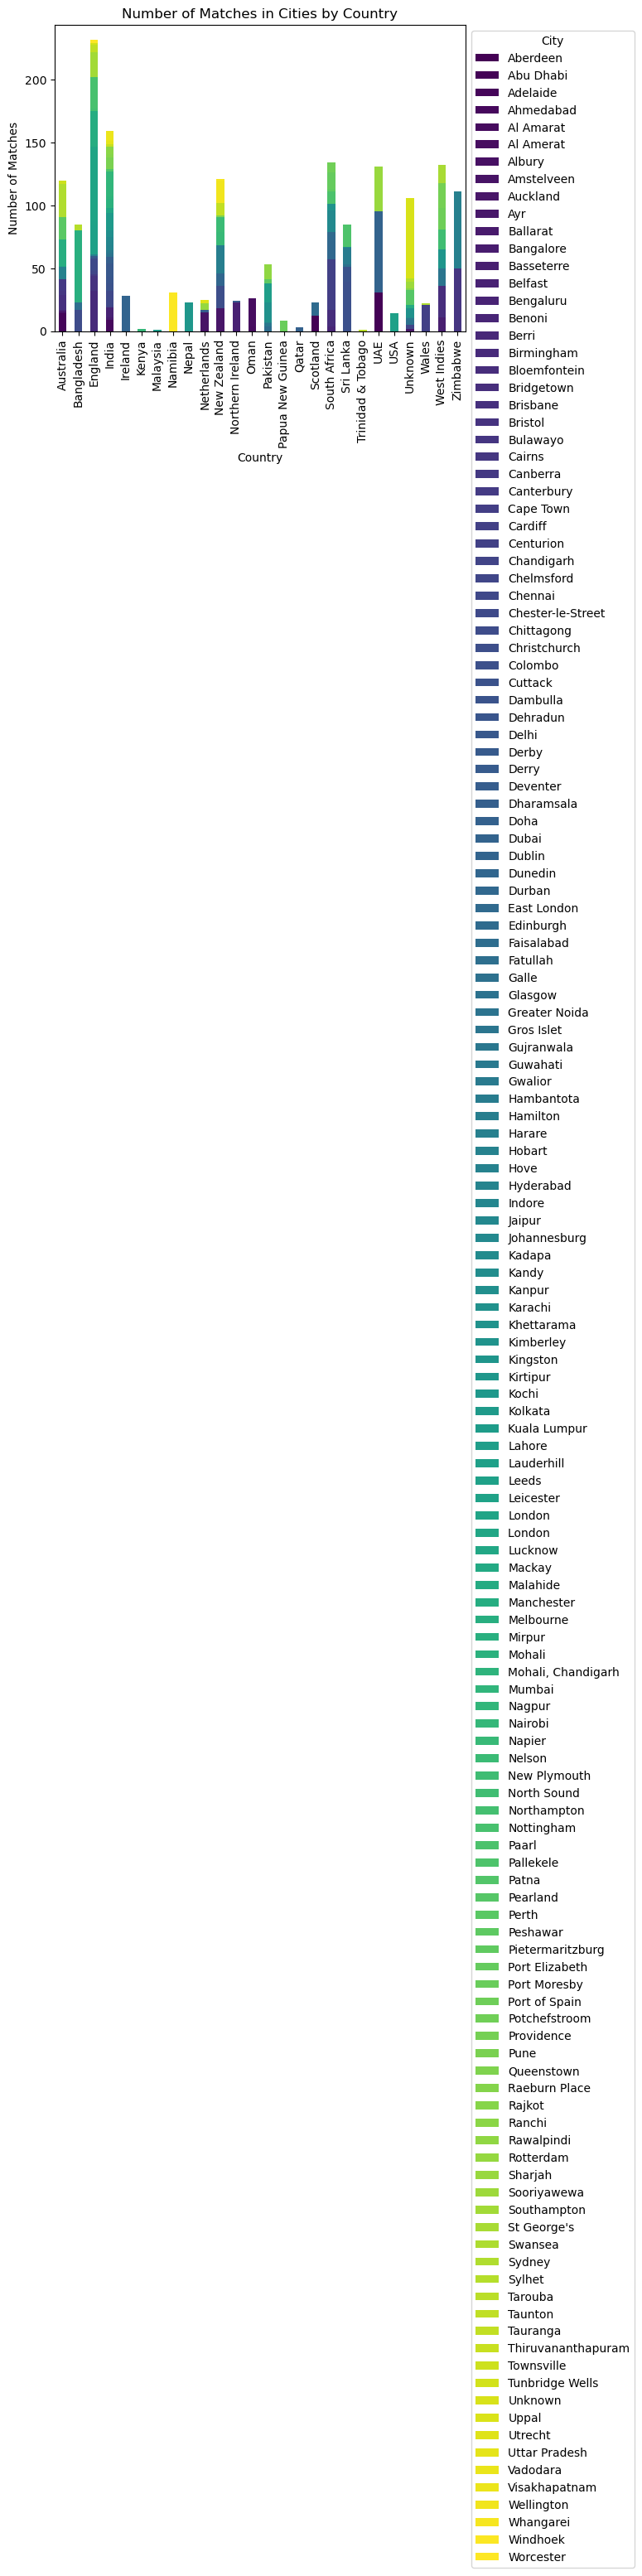

In [186]:
merged_df_inner = pd.merge(df_matches, df_venue, how='inner', left_on='venueId', right_on='id')

#info of the merged data frame
merged_df_inner.info()

# Number of matches in each venue
venue_counts = merged_df_inner['fullName'].value_counts()

# Number of matches in each country
country_counts = merged_df_inner['country'].value_counts()

# Number of matches in each city belonging to a particular country
city_counts = merged_df_inner.groupby(['country', 'city'])['id_x'].count()

# Visualize the number of matches in each venue
# plt.figure(figsize=(12, 6))
# venue_counts.plot(kind='bar', color='skyblue')
# plt.title('Number of Matches in Different Venues')
# plt.xlabel('Venue Name')
# plt.ylabel('Number of Matches')
# plt.show()

# Visualize the number of matches in each country
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='green')
plt.title('Number of Matches in Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.show()

# Visualize the number of matches in each city belonging to a particular country
plt.figure(figsize=(12, 6))
city_counts.unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Matches in Cities by Country')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.show()


In [187]:
# Find the team with the most toss wins and their count
toss_wins_counts = df_matches['toss.winner'].value_counts()
most_toss_wins_team = toss_wins_counts.idxmax()
most_toss_wins_count = toss_wins_counts.max()
toss_wins_counts
# Display the result
print("Team with the most toss wins:", most_toss_wins_team)
print("Toss win count for each country", toss_wins_counts)


Team with the most toss wins: Sri Lanka
Toss win count for each country toss.winner
Sri Lanka                   144
India                       141
Australia                   134
England                     127
New Zealand                 118
South Africa                112
Pakistan                    111
West Indies                 110
Zimbabwe                    107
Unknown                     100
Bangladesh                   82
Ireland                      70
Afghanistan                  55
United Arab Emirates         42
Scotland                     40
Netherlands                  33
Nepal                        32
Namibia                      27
Papua New Guinea             26
Oman                         22
Kenya                        13
Canada                       11
United States of America      9
Windies                       6
United States                 6
Jersey                        4
USA                           4
UAE                           3
Hong Kong           

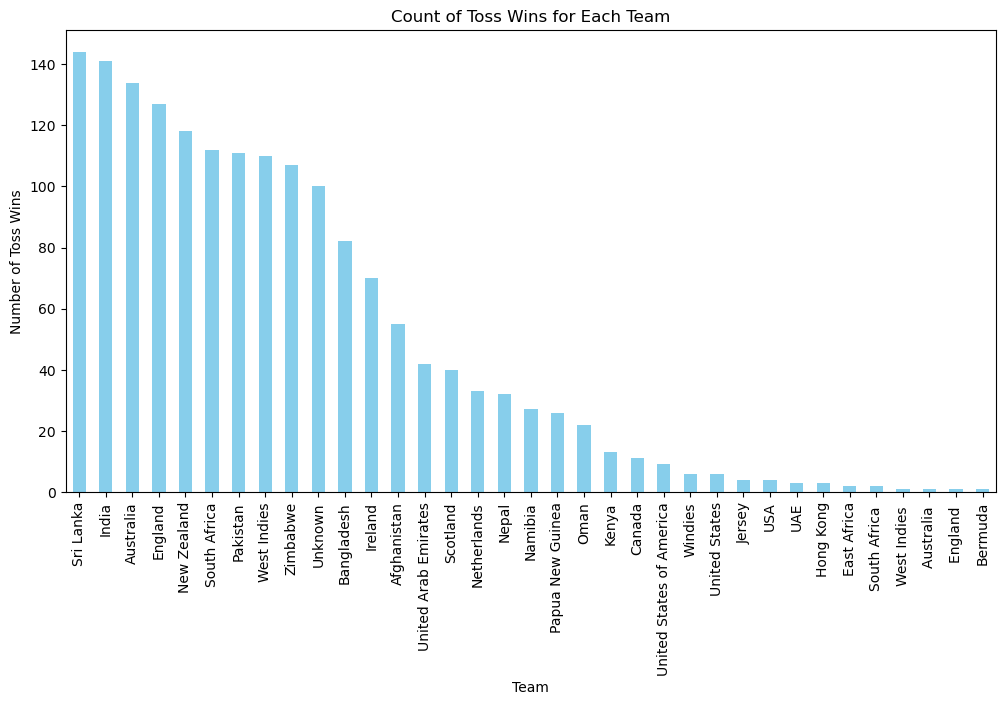

In [188]:
# Plotting the count of toss wins for each team
plt.figure(figsize=(12, 6))
toss_wins_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Toss Wins for Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.show()

Let's find out the team with the most toss wins for each venue

In [189]:
# Merge 'matches' DataFrame with 'df_venue' DataFrame based on 'venueId'
merged_df = pd.merge(df_matches, df_venue, how='left', left_on='venueId', right_on='id')

# Find the team with the most toss wins for each venue
most_toss_wins_by_venue = merged_df.groupby(['fullName', 'toss.winner'])['id_x'].count().reset_index()
most_toss_wins_by_venue = most_toss_wins_by_venue.rename(columns={'id_x': 'TossWinsCount'})
most_toss_wins_by_venue = most_toss_wins_by_venue.sort_values(by='TossWinsCount', ascending=False)
most_toss_wins_by_venue = most_toss_wins_by_venue.groupby('fullName').first()

# Display the result
print("Team with the most toss wins for each venue:")
print(most_toss_wins_by_venue[['toss.winner', 'TossWinsCount']])


Team with the most toss wins for each venue:
                                    toss.winner  TossWinsCount
fullName                                                      
ACA-VDCA Stadium                          India              3
Adelaide Oval                         Australia              6
Affies Park                    Papua New Guinea              1
Al Amerat Cricket Ground 2             Scotland              2
Amini Park                              Namibia              3
...                                         ...            ...
Westpac Stadium                     New Zealand              2
Willowmoore Park                        Ireland              2
YS Raja Reddy Stadium                 Australia              1
Zahur Ahmed Chowdhury Stadium        Bangladesh              8
Zayed Cricket Stadium               Afghanistan              4

[179 rows x 2 columns]


In [190]:

# Merge the two DataFrames based on the common column 'id' and 'venueId'
merged_df = pd.merge(df_matches, df_venue, how='left', left_on='venueId', right_on='id')

# Group by 'fullName' and 'toss.winner' and calculate the count
toss_wins_by_country_and_venue = merged_df.groupby(['fullName', 'toss.winner'])['id_x'].count().reset_index()
toss_wins_by_country_and_venue = toss_wins_by_country_and_venue.rename(columns={'id_x': 'TossWinsCount'})

# Print or display the result
print(toss_wins_by_country_and_venue)
selected_venue_data  = toss_wins_by_country_and_venue[toss_wins_by_country_and_venue['fullName'] == 'Wankhede Stadium']
print(selected_venue_data)


                  fullName           toss.winner  TossWinsCount
0         ACA-VDCA Stadium                 India              3
1         ACA-VDCA Stadium               Unknown              1
2         ACA-VDCA Stadium           West Indies              2
3            Adelaide Oval             Australia              6
4            Adelaide Oval               England              2
..                     ...                   ...            ...
783  Zayed Cricket Stadium              Scotland              1
784  Zayed Cricket Stadium          South Africa              2
785  Zayed Cricket Stadium             Sri Lanka              2
786  Zayed Cricket Stadium  United Arab Emirates              2
787  Zayed Cricket Stadium               Unknown              3

[788 rows x 3 columns]
             fullName   toss.winner  TossWinsCount
744  Wankhede Stadium     Australia              2
745  Wankhede Stadium        Canada              1
746  Wankhede Stadium         India              3
747 

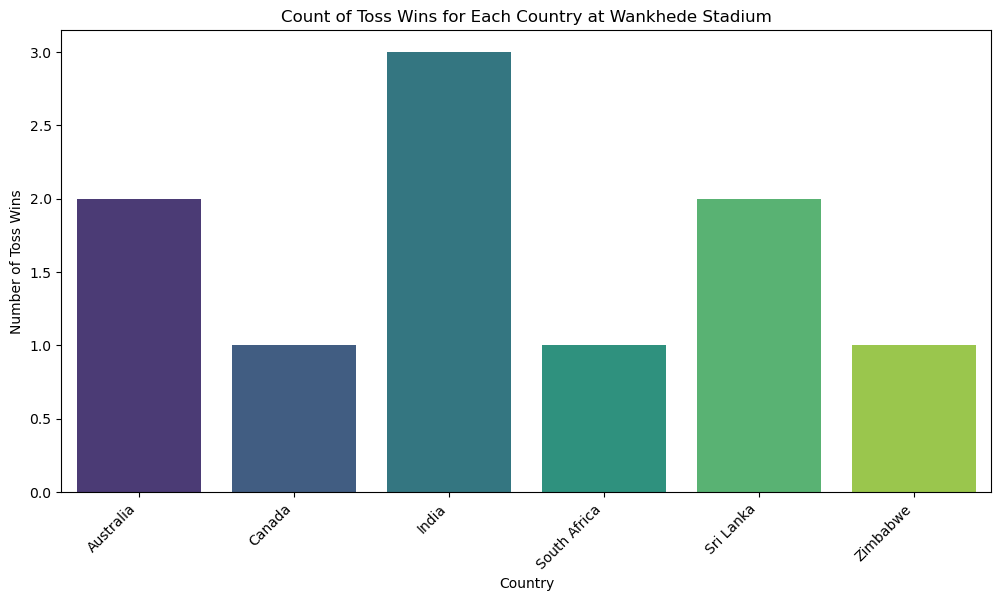

In [191]:
# Visualize the count of toss wins for each country at the selected venue
plt.figure(figsize=(12, 6))
sns.barplot(x='toss.winner', y='TossWinsCount', data=selected_venue_data, palette='viridis')
plt.title(f'Count of Toss Wins for Each Country at {selected_venue}')
plt.xlabel('Country')
plt.ylabel('Number of Toss Wins')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

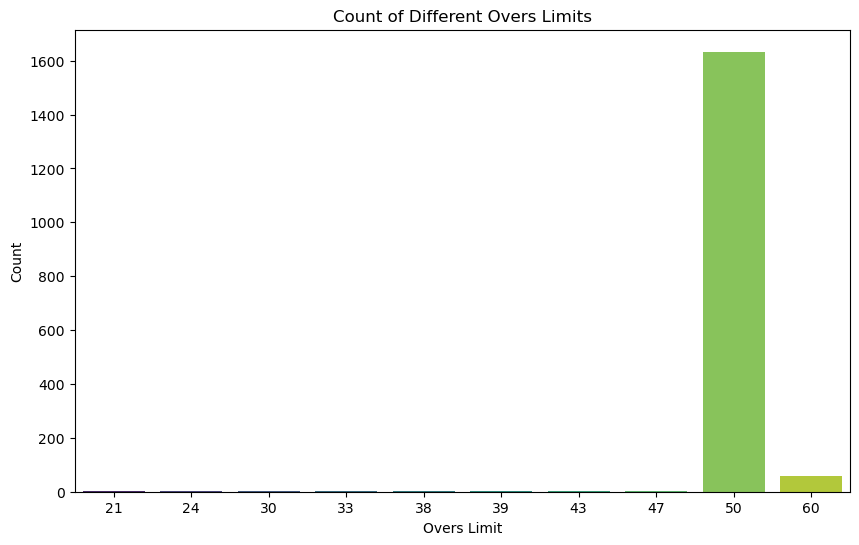

In [192]:
# Count the occurrences of each unique value in 'oversLimit'
overlimit_counts = df_matches['oversLimit'].value_counts()

# Sort by the overs limit value for better visualization
overlimit_counts = overlimit_counts.sort_index()

# Visualize the count of different overlimits
plt.figure(figsize=(10, 6))
sns.barplot(x=overlimit_counts.index, y=overlimit_counts.values, palette='viridis')
plt.title('Count of Different Overs Limits')
plt.xlabel('Overs Limit')
plt.ylabel('Count')
plt.show()






# Innings

In [193]:
aboutData(df_innings)

----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2682 non-null   int64  
 1   matchId        2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool   
 11  noBallRuns     2682 non-null   int64  
 12  wideRuns       2682 non-null   int64  
 13  byeRuns        2682 non-null   int64  
 14  legByeRuns     2682 non-null   int64  
 15  penaltyRuns    2682 non-null   int64  
 16  battingTeamId  601 non-null    float64
 17  bowlingTeamId  601 non-nul

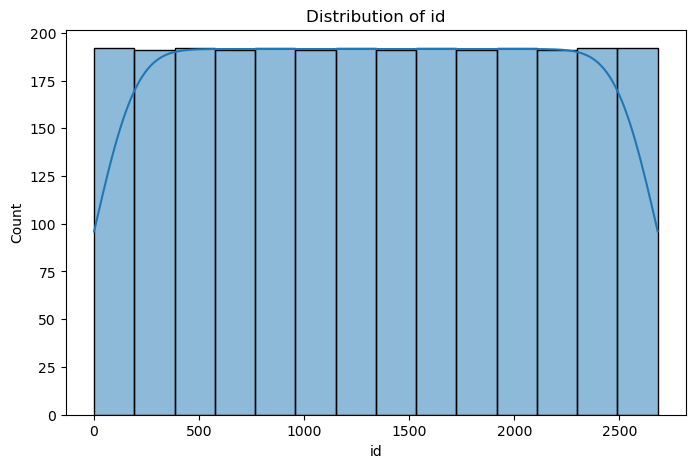

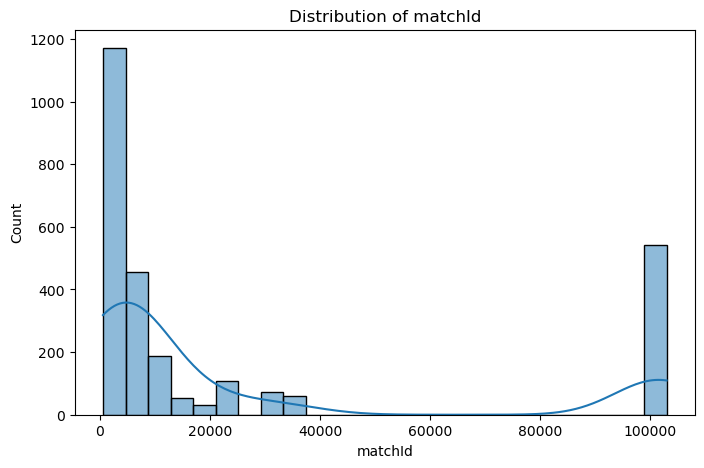

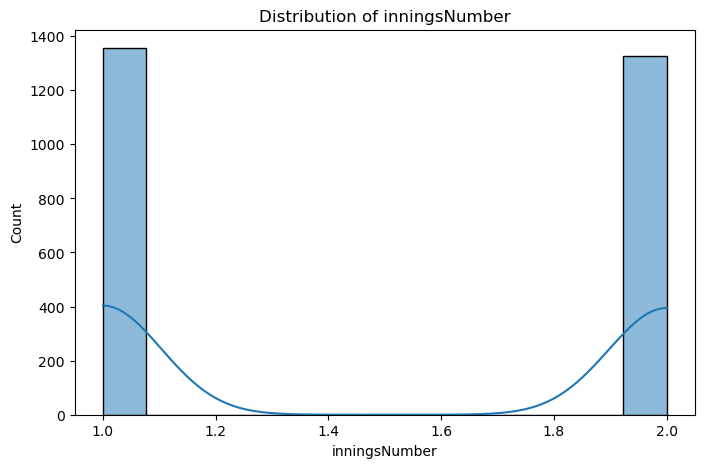

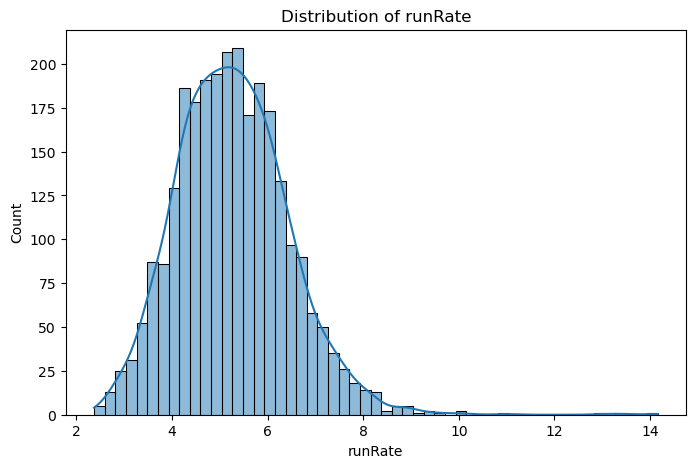

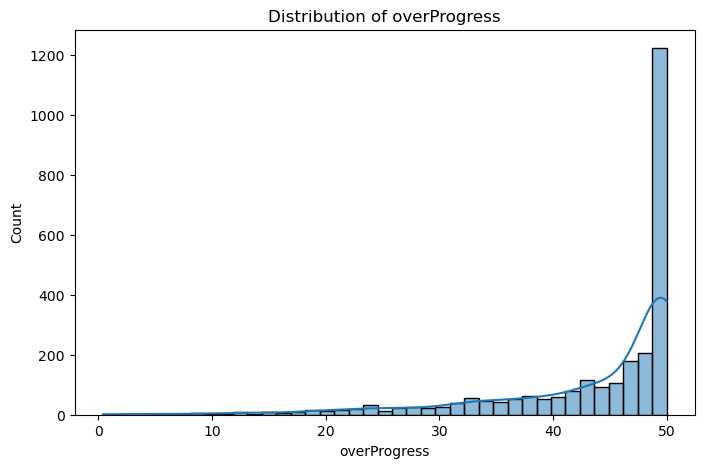

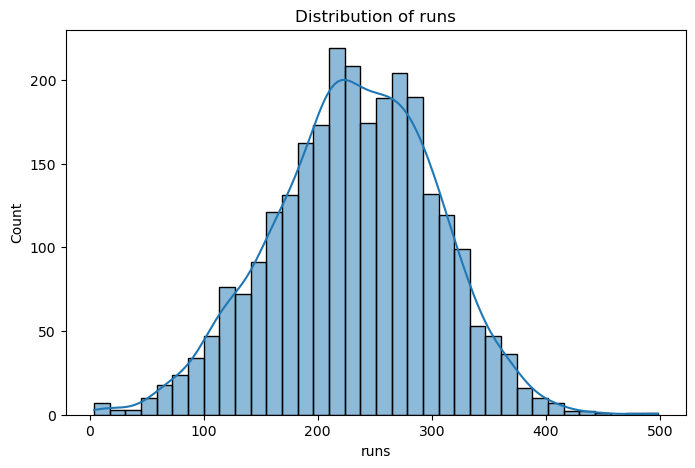

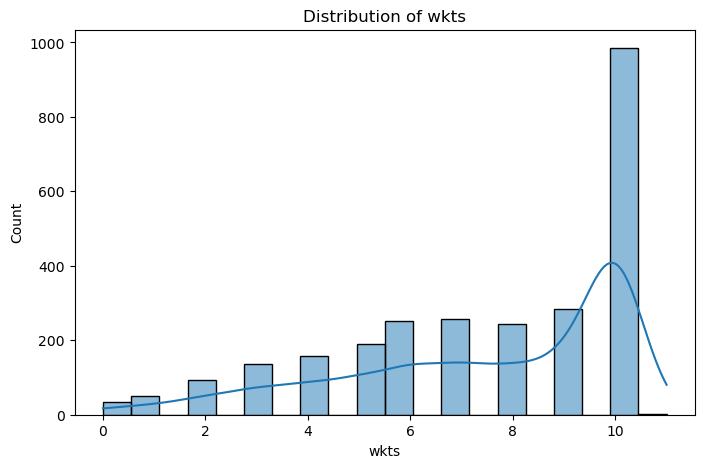

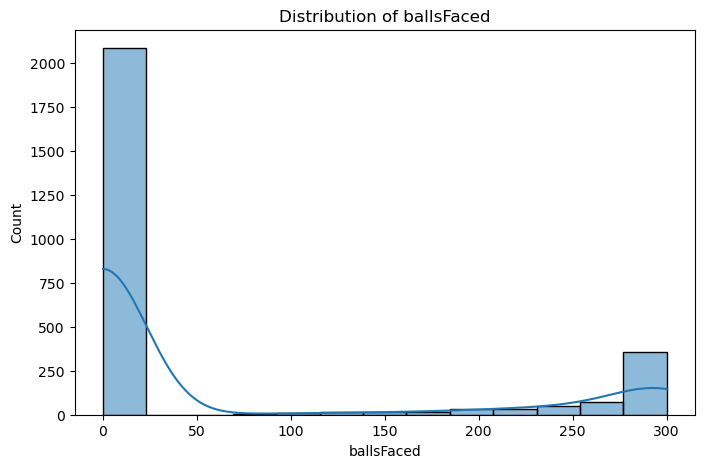

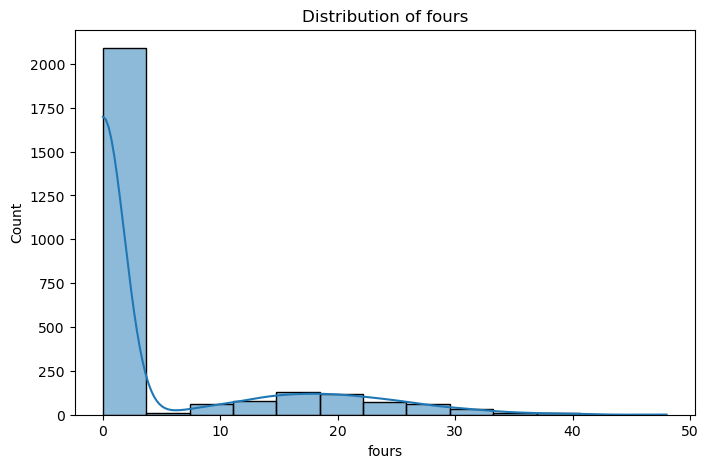

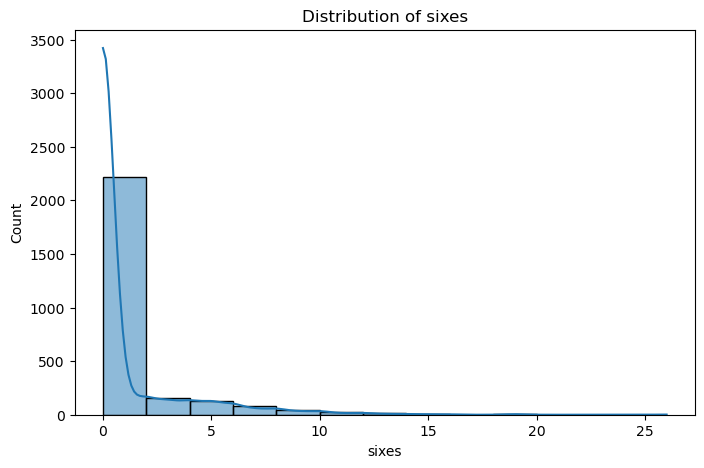

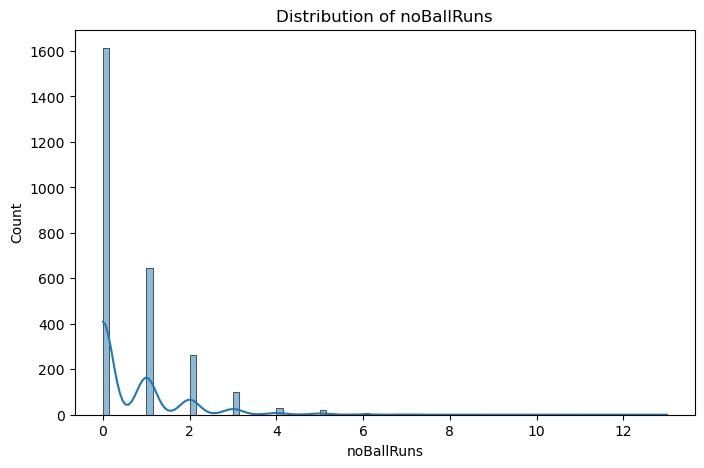

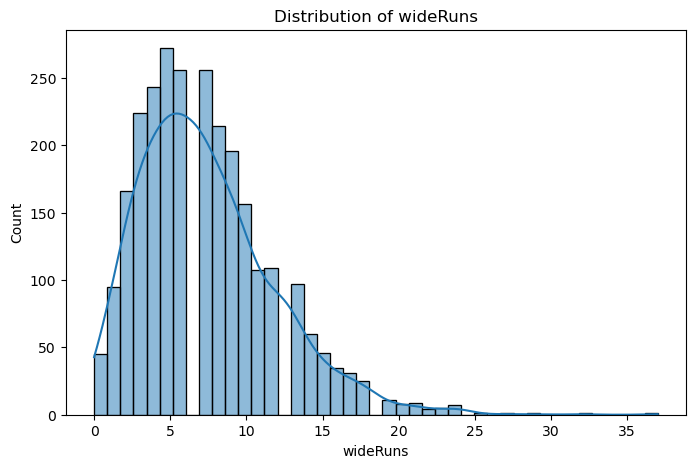

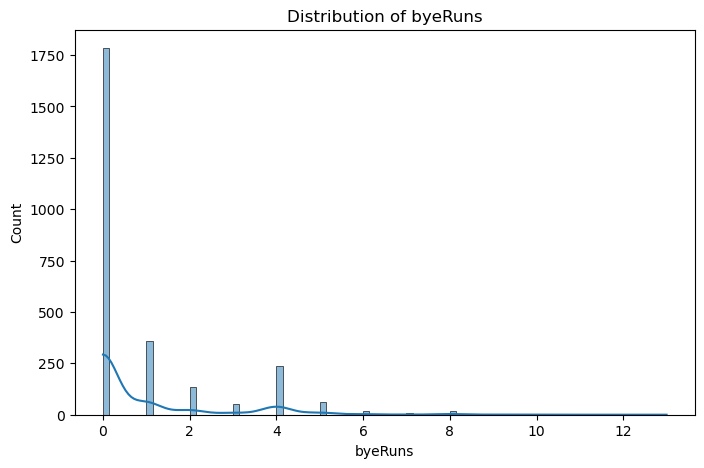

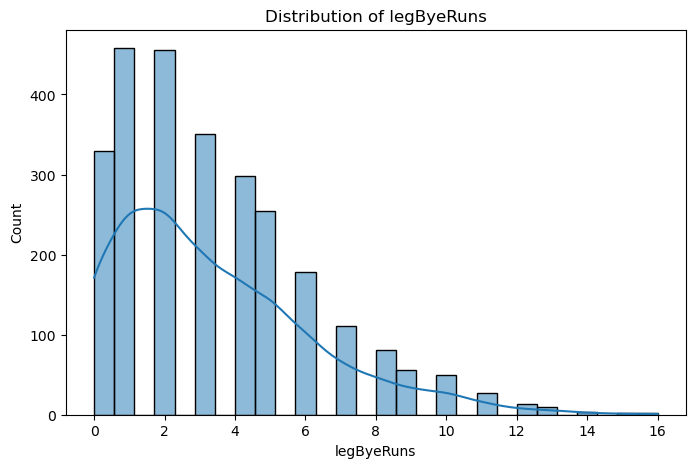

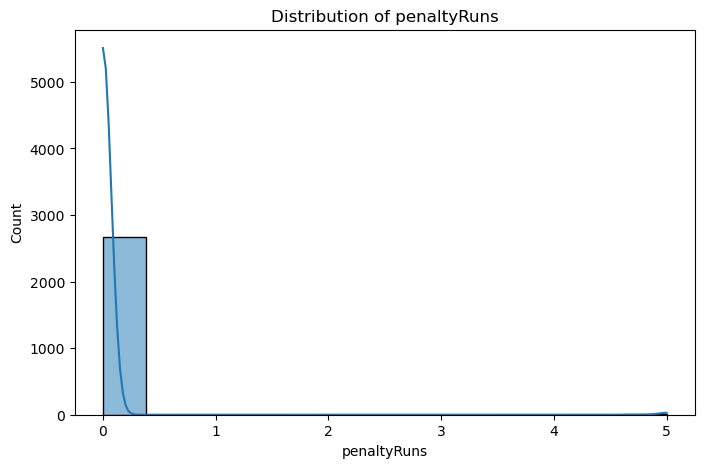

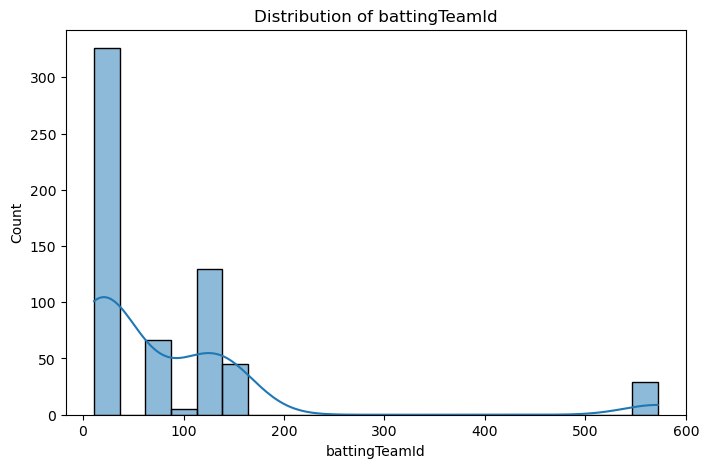

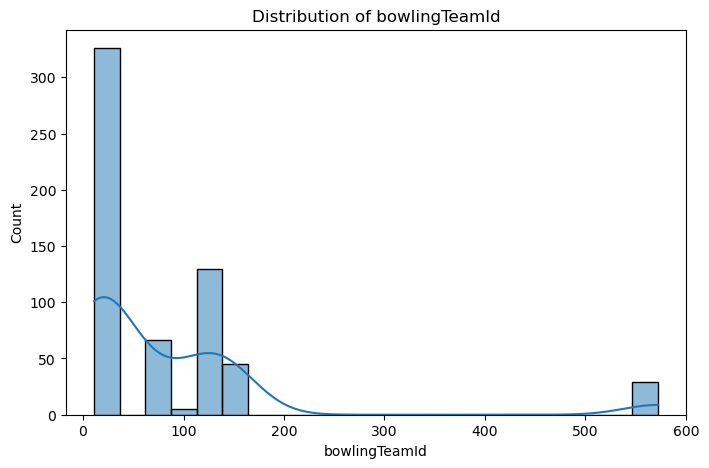

In [194]:
# Visualize distributions of numeric columns
numeric_columns = df_innings.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_innings[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

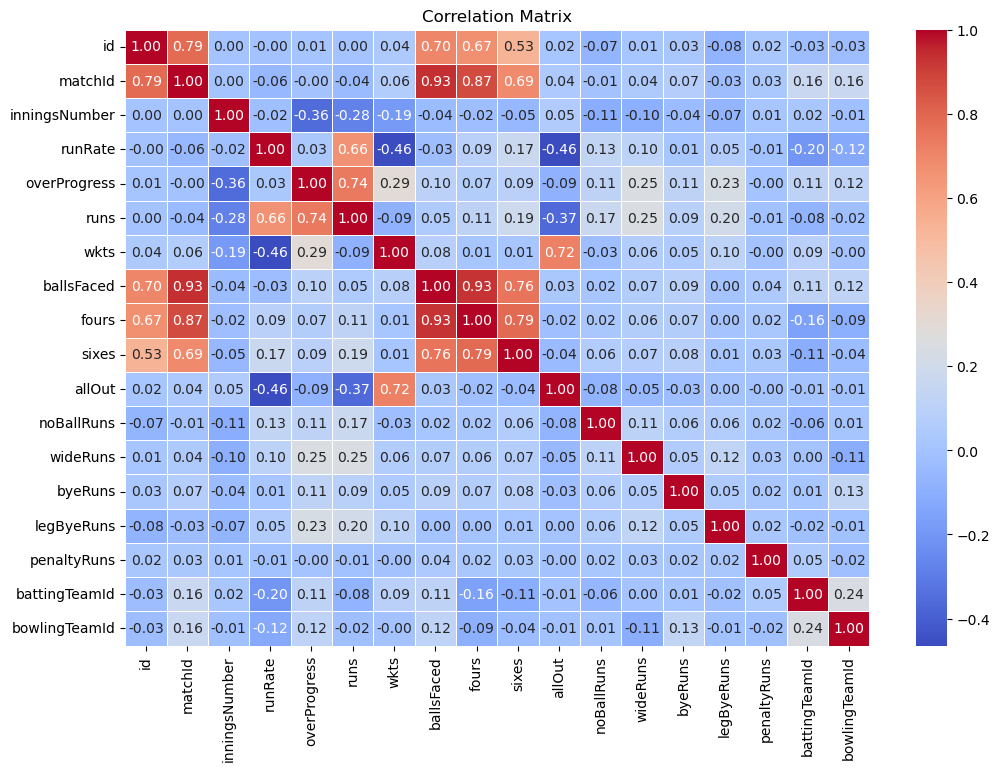

In [195]:
# Visualize correlations between numeric columns
correlation_matrix = df_innings.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

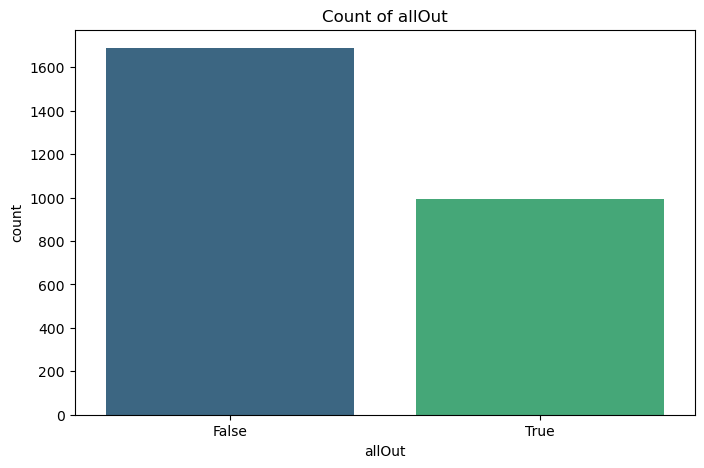

In [196]:
# Visualize categorical columns
categorical_columns = df_innings.select_dtypes(include=['object', 'bool']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df_innings, palette='viridis')
    plt.title(f'Count of {column}')
    plt.show()

We can extract only meaningful values from the outputs below. Like finding the maximum value for run rate makes sense
but for match Id, it doesnot.

In [197]:
# Find the maximum values of numeric columns
max_values = df_innings.select_dtypes(include=['int64', 'float64']).max()

# Find the minimum values of numeric columns
min_values = df_innings.select_dtypes(include=['int64', 'float64']).min()

# Display the results
print("Maximum values:")
print(max_values)

print("\nMinimum values:")
print(min_values)

# Find the average values of numeric columns
average_values = df_innings.select_dtypes(include=['int64', 'float64']).mean()

# Display the results
print("Average values:")
print(average_values)

# Find the sum of values for numeric columns
sum_values = df_innings.select_dtypes(include=['int64', 'float64']).sum()

# Display the results
print("Sum values:")
print(sum_values)

Maximum values:
id                 2682.00
matchId          102980.00
inningsNumber         2.00
runRate              14.16
overProgress         50.00
runs                498.00
wkts                 11.00
ballsFaced          300.00
fours                48.00
sixes                26.00
noBallRuns           13.00
wideRuns             37.00
byeRuns              13.00
legByeRuns           16.00
penaltyRuns           5.00
battingTeamId       572.00
bowlingTeamId       572.00
dtype: float64

Minimum values:
id                 1.00
matchId          543.00
inningsNumber      1.00
runRate            2.37
overProgress       0.40
runs               4.00
wkts               0.00
ballsFaced         0.00
fours              0.00
sixes              0.00
noBallRuns         0.00
wideRuns           0.00
byeRuns            0.00
legByeRuns         0.00
penaltyRuns        0.00
battingTeamId     11.00
bowlingTeamId     11.00
dtype: float64
Average values:
id                1341.500000
matchId          26651.4

In [198]:
# Find the match with the highest run rate
highest_run_rate_match_id = df_innings.loc[df_innings['runRate'].idxmax(), 'matchId']

# Find the match with the highest number of wickets
highest_wickets_match_id = df_innings.loc[df_innings['wkts'].idxmax(), 'matchId']

# Find the match with the highest number of sixes
highest_sixes_match_id = df_innings.loc[df_innings['sixes'].idxmax(), 'matchId']

# Find the match with the highest number of fours
highest_fours_match_id = df_innings.loc[df_innings['fours'].idxmax(), 'matchId']

# Find the match with the highest number of fours
highest_runs_match_id = df_innings.loc[df_innings['runs'].idxmax(), 'matchId']

# Find the match with the highest number of noBallRuns
highest_noBallRuns_match_id = df_innings.loc[df_innings['noBallRuns'].idxmax(), 'matchId']


# Extract match details from df_matches
highest_run_rate_match_details = df_matches[df_matches['id'] == highest_run_rate_match_id]
highest_wickets_match_details = df_matches[df_matches['id'] == highest_wickets_match_id]
highest_sixes_match_details = df_matches[df_matches['id'] == highest_sixes_match_id]
highest_fours_match_details = df_matches[df_matches['id'] == highest_fours_match_id]
highest_run_match_details = df_matches[df_matches['id'] == highest_runs_match_id]
highest_noBallRuns_match_details = df_matches[df_matches['id'] == highest_noBallRuns_match_id]


# Display the results
print("Match with the Highest Run Rate:")
print(highest_run_rate_match_details)

print("\nMatch with the Highest Number of Wickets:")
print(highest_wickets_match_details)

print("\nMatch with the Highest Number of Sixes:")
print(highest_sixes_match_details)

print("\nMatch with the Highest Number of Fours:")
print(highest_fours_match_details)

print("\nMatch with the Highest Number of Runs:")
print(highest_run_match_details)


print("\nMatch with the Highest Number of No Ball Runs:")
print(highest_noBallRuns_match_details)


Match with the Highest Run Rate:
       id  venueId                 toss.elected toss.winner  team1Id  team2Id  \
725  3583       89  Sri Lanka, who chose to bat   Sri Lanka     4142     4143   

                    matchDate              matchEndDate   matchDateMs  \
725  2015-12-28T11:00:00+1300  2015-12-28T23:00:00+1300  1.451250e+12   

     matchEndDateMs  ... description matchSummary matchType  \
725    1.451300e+12  ...     2nd ODI          NaN       ODI   

                  tournamentLabel  oversLimit totalBalls isLimitedOvers  \
725  New Zealand v Sri Lanka 2015          50        NaN           True   

    match.summary matchStatus  umpire.name.5  
725           NaN         NaN        Unknown  

[1 rows x 25 columns]

Match with the Highest Number of Wickets:
       id  venueId                    toss.elected toss.winner  team1Id  \
954  7716      123  Bangladesh, who chose to field  Bangladesh     8673   

     team2Id                 matchDate              matchEndDate  \


The above analysis can be done for as many fields as we want